# Introduction

This worksheet focuses on Neural Networks. You will:

- Implement your own version of a Single Layer Perceptron (SLP) to understand the underlying mechanics, and compare it with an equivalent implementation built using `PyTorch`.

- Build and train Multi‑Layer Perceptrons (MLPs) in `PyTorch` for both classification and regression tasks, exploring how to design, configure, and optimise these neural network models.

# 0. Preliminaries
We firstly import NumPy and matplotlib as we will be using these throughout the worksheet. We use a function %matplotlib inline to display plots in the worksheet.

In [18]:
#TODO: import NumPy and matplotlib here

import matplotlib.pyplot as plt
import numpy as np

# 1. Single Layer Perceptron
In this question, you will build and train a single‑layer perceptron using PyTorch to make predictions on the breast cancer dataset.
This is a binary classification task where the goal is to classify each instance as malignant or benign based on 30 numerical features extracted from medical images.

In this question, you will:

(a) Load the breast cancer dataset from  `sklearn` and store the features and targets in suitable variables.\
(b) Separate your data into a training and test split.\
(c) (Optional) Write your own function to implement Single Layer Perceptron.\
(d) Implement Single Layer Perceptron in `PyTorch` (e.g., a single `nn.Linear` layer with a `sigmoid` output).\
    Train your PyTorch perceptron on the training data using an appropriate loss function and an optimizer.\
(e) Evaluate the performance of both models on the test data using appropriate metrics (e.g., accuracy, precision).     
(f) Plot the confusion matrix to visualise the performance of your model.

## Part (a)  
Import the package `datasets` from `sklearn` and then load the load_breast_cancer dataset (function is `load_breast_cancer()`). Save the data into a variable `X` and the targets into a variable `Y`.  
Take a look at the data in `X`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`).  
Take a look at the targets. Is this suitable for a classification algorithm or a regression algorithm?  

In [19]:
#TODO: import suitable packages, load the dataset, and save data and targets into variables X and Y

from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

X = dataset.data
Y = dataset.target

In [20]:
X.shape

(569, 30)

In [21]:
Y.shape

(569,)

In [22]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Part (b)

Use the function `train_test_split` from `sklearn.model_selection` to split your data into a training set and a held-out test set. Use a test set that is 0.2 of the original dataset. Set the parameter `random_state` to 10 to help with replication.

In [23]:
# TODO: import the package train_test_split from sklearn.model_selection.

from sklearn.model_selection import train_test_split

# Split the dataset into Xtr, Xtest, Ytr, Ytest
Xtr, Xtest, Ytr, Ytest = train_test_split(X,Y, test_size=0.2, random_state=10)


Perceptrons are very sensitive to feature scale. Standardise your input data by applying `StandardScaler` from `sklearn.preprocessing` to both the training set (`Xtr`) and the test set (`Xtest`).

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xtest = scaler.transform(Xtest)

## (Optional) Part (c)  
Recall from the lecture that a single-layer perceptron runs as follows:  

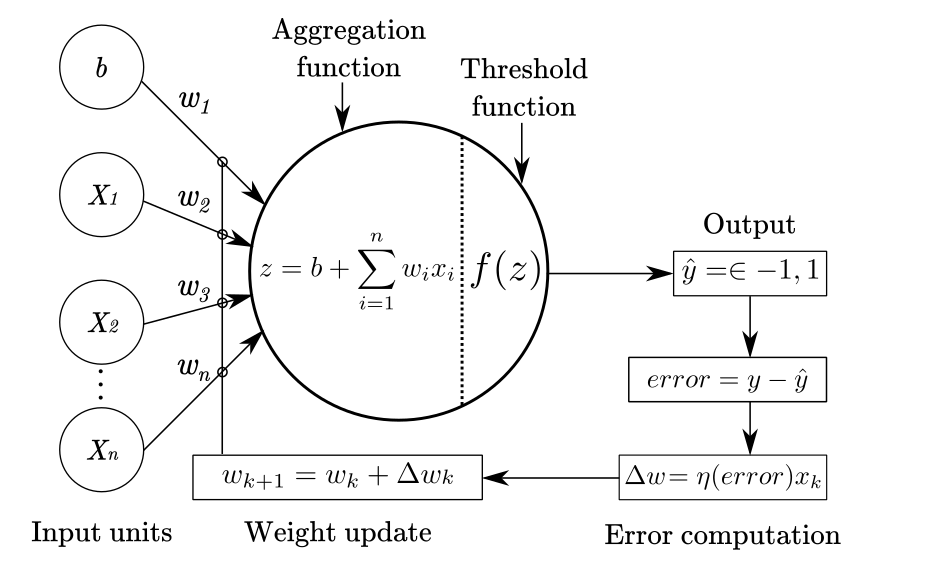

**Training step**:  
- For each training datapoint $(\vec{x}_i)$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x}_i + b)$.  
  - Pass $(z)$ through the activation function (sigmoid function in this case) to get the predicted class $(y_{\text{pred}})$.  
  - Compute the error as $(e = y_i - y_{\text{pred}})$, where $(y_i)$ is the true label.  
  - Update the weights and bias using the perceptron learning rule:  
    $[
    \vec{w} \gets \vec{w} + \eta \cdot e \cdot \vec{x}_i  
    ]  
    [
    b \gets b + \eta \cdot e
    ]$  
  Here, $(\eta)$ is the learning rate.  

**Prediction step**:  
- For a given datapoint $(\vec{x})$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x} + b)$.  
  - Pass $(z)$ through the step function to obtain the class prediction.  

Write function(s) to implement the training and prediction steps. Y
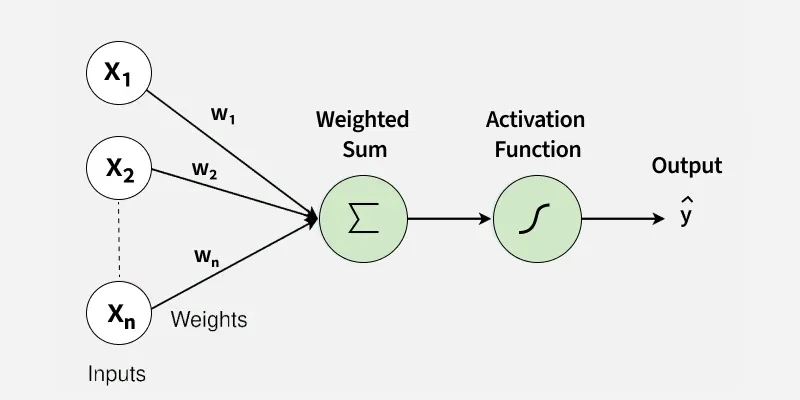

## What is a perceptron (in one sentence)

A **perceptron** is the **simplest possible learning model** that learns a **linear decision boundary** to separate two classes.

Think:

> “Given some features, can I draw **one straight line (or hyperplane)** that separates class A from class B?”

---

## What problem does a perceptron solve?

* **Binary classification**
* Only when classes are **linearly separable**

Examples it can solve:

* spam vs not spam (if linearly separable)
* malignant vs benign tumors (often approximately)
* owl vs albatross (in the example)

Examples it **cannot** solve:

* XOR
* concentric circles
* any problem requiring a curved boundary

---

## Inputs and outputs

### Input

* A vector of features
  $$x = (x_1, x_2, \dots, x_n)$$

Example:

* weight
* wingspan

### Output

* A **class label**

  * classic perceptron: $${-1, +1}$$
  * modern version: $${0, 1}$$
* If you use a sigmoid: a **probability**, then thresholded

---

## The perceptron’s 3 core components

### 1️⃣ Linear combination (aggregation)

The perceptron computes:

$$
z = \vec{w} \cdot \vec{x} + b
$$

* $$\vec{w}$$ = weights (learned)
* $$b$$ = bias (learned)
* $$z$$ = raw score

Geometrically:

* This defines a **hyperplane**
* The equation $$\vec{w} \cdot \vec{x} + b = 0$$ is the **decision boundary**

---

### 2️⃣ Activation / decision function

#### Classic perceptron

Uses a **step function**:

$$
\hat{y} =
\begin{cases}
1 & \text{if } z \ge 0 \
-1 & \text{otherwise}
\end{cases}
$$

#### Your implementation (modern variant)

Uses **sigmoid**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This gives:

* a value in $(0,1)$
* interpreted as **probability of class 1**

Then you apply a threshold:

```python
y = (prob >= 0.5).astype(int)
```

---

### 3️⃣ Learning rule (how it learns)

The perceptron learns by **error correction**.

For each training example:

1. Make a prediction
2. Compute the error:

$$
e = y - \hat{y}
$$

3. Update parameters:

$$
\vec{w} \leftarrow \vec{w} + \eta \cdot e \cdot \vec{x}
$$

$$
b \leftarrow b + \eta \cdot e
$$

What this means intuitively:

* If prediction is correct → do nothing
* If prediction is wrong → move the decision boundary **toward the mistake**

This is repeated over the dataset multiple times (epochs).

---

## Step-by-step algorithm (clean version)

For each epoch:

1. Take one input vector $$x$$
2. Compute $$z = \vec{w} \cdot \vec{x} + b$$
3. Apply activation → prediction
4. Compare prediction with true label
5. Update weights and bias if wrong

Stop when:

* error stops decreasing, or
* max number of iterations is reached

---

## What does the perceptron “learn”?

It learns:

* **how important each feature is** (weights)
* **where the decision boundary should be** (bias)

It does **not**:

* learn non-linear patterns
* learn hierarchical representations
* solve complex vision or language tasks

In [25]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate, iterat):
        #TODO# initialise the weights to random values and set the bias to 0
        self.weights = np.random.rand(np.asarray(input_size))
        self.bias = 0
        self.learning_rate = learning_rate
        self.iterat = iterat

    def activation(self, z):
        #TO DO # Write a function to implement the **sigmoid activation function**. 
        return 1 / (1 + np.exp(-z))
   
    def train(self, X, y):
        for epoch in range(self.iterat):
            for i in range(X.shape[0]):
                # Calculate the linear combination
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(z)

                #TODO# Calculate error between target and predicted values
                error = y[i] - y_pred
                
                #TODO# update the weights and bias according to the above equations
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
#Train the perceptron
input_size = Xtr.shape[1] # To pass the number of features
perceptron1 = SingleLayerPerceptron(input_size=input_size, learning_rate=0.01, iterat=10)

##TODO##  #Train the perceptron with the Train data
perceptron1.train(Xtr, Ytr)

#Test the perceptron
my_y_pred_prob = perceptron1.predict(Xtest)
my_Ypred = (my_y_pred_prob >= 0.5).astype(int).flatten()

In [26]:
Xtest[1]

array([-1.37090981,  0.63442322, -1.36633653, -1.11508326, -0.32487582,
       -0.95188248, -0.6320052 , -0.95282893, -0.45612317,  0.40945034,
       -0.38716545,  1.25544894, -0.38335638, -0.49338679,  1.24856129,
       -0.41942847,  0.36937565,  0.14915046,  2.26078304,  0.33596754,
       -1.35128896, -0.08578556, -1.34028906, -1.04502258, -1.02791842,
       -1.1170076 , -0.94511743, -1.38817646, -0.80116052, -0.57242973])

In [27]:
my_Ypred[1]

np.int64(1)

## Part (d) Perceptron in PyTorch
In this step, you will build a simple neural network model that implements a single‑layer perceptron in PyTorch. A perceptron consists of one fully‑connected (linear) layer that computes a weighted sum of the inputs, followed by an activation function that maps this value to a predicted class. For binary classification, we apply a sigmoid activation, which converts the linear output into a probability between 0 and 1.

### Fully-connected layer
A fully‑connected layer connects every input feature to every output unit. In PyTorch, this is implemented using the `nn.Linear` class, which performs the linear transformation  $(z = \vec{w} \cdot \vec{x}_i + b)$ before the activation function is applied.

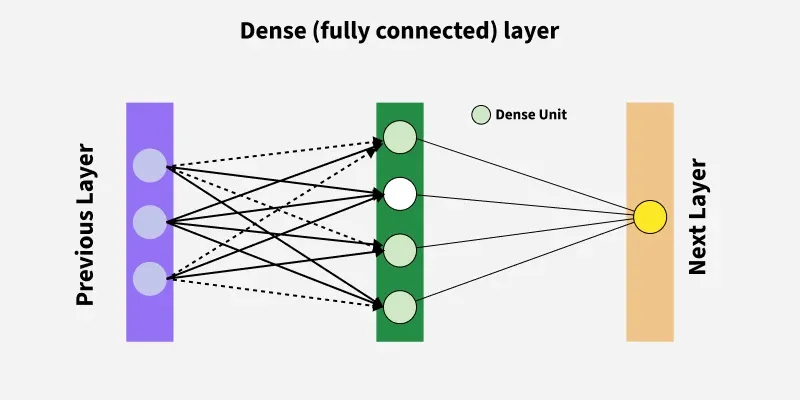

Documentation: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

### Activation Functions
PyTorch does not include activation functions inside `nn.Linear`, so they must be added explicitly. For a perceptron used in binary classification, we apply `torch.sigmoid()` to the output of the linear layer. This produces a probability that can be thresholded to obtain a class label.

Forward Pass
In PyTorch, the `forward()` method defines how data flows through the model. Inputs are passed through the linear layer, then through the activation function, and the final output is returned. This computation graph determines how gradients are calculated during training.

Let's import necessary libraries

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

In [29]:
class PerceptronTorch(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))
        

After desigining our network, we need to create a training function to calculate the loss for each input and perform backpropagation to optimise the network.
During training, the weights of all the layers will be updated.

Below, we build a training function to train the NN over a fixed number of epochs (an epoch is one iteration over the whole training dataset).
The function also prints the performance of both training and development/validation set after each epoch.

Here we use binary cross‑entropy loss, which is the standard loss function for binary classification tasks such as logistic regression. The module `nn.BCELoss()` expects the model to output probabilities (after a sigmoid), so we do not need to implement any additional activation inside the loss function.

Binary cross entropy Loss: https://docs.pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

The optimizer object implements a particular algorithm for updating the weights. Here, we will use the Adam optimizer, which is a variant of stochastic gradient descent method that tends to find a better solution in a smaller number of iterations than standard SGD.

Optimization: https://pytorch.org/docs/stable/optim.html

The cell below defines a training function for our classifier. 

In [30]:
model = PerceptronTorch(input_dim=Xtr.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

We need to convert our data into PyTorch‑compatible tensors so the model can train on it. PyTorch cannot operate directly on NumPy arrays — it requires tensors, which are optimized for automatic differentiation and efficient computation on both CPUs and GPUs.

In [31]:
Xtr_t = torch.tensor(Xtr, dtype=torch.float32)
Ytr_t = torch.tensor(Ytr, dtype=torch.float32).view(-1, 1)

Xtest_t = torch.tensor(Xtest, dtype=torch.float32)

### Train the Perceptron 

This training loop does the following:

- Runs for a fixed number of epochs so the model repeatedly sees the training data.
- Performs a forward pass on the training set to compute predictions.
- Calculates the training loss and stores it for plotting.
- Backpropagates the error and updates the model’s weights using the optimizer.
- Evaluates the model on the test set (in eval mode and without gradients).
- Records the validation loss to track generalisation.

Plots both curves so you can compare training vs. validation loss over time.

**TO-DO:**  Train the network for 30 epochs and plot the losses by completing the cell below. At which epoch did we get the best model fit? How could we use the dev set losses to return the best model? Remember that neural networks tend to overfit if trained too long, as they have many parameters and are very flexible. 

Note that the answer can vary each time you run the training process due to random initialisation of the model weights and shuffling of the dataset. 

ANSWER
   * The plot shows the best fit around ... epochs before it starts to overfit, as the validation loss converges while training loss goes down 
   * If dev set loss stops going down for a long time, but training set loss keeps decreasing, the model may be overfitting.
   * We can stop training at the point where dev set loss stops decreasing 
   * Or we could save the model with best dev set performance and use that model to make predictions.

Epoch 1/num_epochs, Loss: 0.6533
Epoch 2/num_epochs, Loss: 0.5874
Epoch 3/num_epochs, Loss: 0.5297
Epoch 4/num_epochs, Loss: 0.4798
Epoch 5/num_epochs, Loss: 0.4370
Epoch 6/num_epochs, Loss: 0.4006
Epoch 7/num_epochs, Loss: 0.3697
Epoch 8/num_epochs, Loss: 0.3433
Epoch 9/num_epochs, Loss: 0.3208
Epoch 10/num_epochs, Loss: 0.3015
Epoch 11/num_epochs, Loss: 0.2847
Epoch 12/num_epochs, Loss: 0.2701
Epoch 13/num_epochs, Loss: 0.2573
Epoch 14/num_epochs, Loss: 0.2459
Epoch 15/num_epochs, Loss: 0.2358
Epoch 16/num_epochs, Loss: 0.2267
Epoch 17/num_epochs, Loss: 0.2186
Epoch 18/num_epochs, Loss: 0.2112
Epoch 19/num_epochs, Loss: 0.2044
Epoch 20/num_epochs, Loss: 0.1983
Epoch 21/num_epochs, Loss: 0.1926
Epoch 22/num_epochs, Loss: 0.1874
Epoch 23/num_epochs, Loss: 0.1826
Epoch 24/num_epochs, Loss: 0.1782
Epoch 25/num_epochs, Loss: 0.1741
Epoch 26/num_epochs, Loss: 0.1702
Epoch 27/num_epochs, Loss: 0.1666
Epoch 28/num_epochs, Loss: 0.1633
Epoch 29/num_epochs, Loss: 0.1601
Epoch 30/num_epochs, Lo

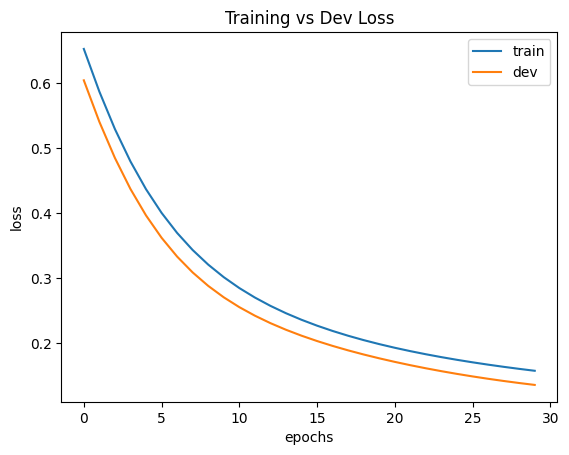

In [32]:
num_epochs=30
train_losses = []
dev_losses = []

### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # forward pass
    outputs = model(Xtr_t)
    loss = criterion(outputs, Ytr_t)
    train_losses.append(loss.item())

    # backward + update
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/num_epochs, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model.eval()
    with torch.no_grad():
        dev_out = model(Xtest_t)
        dev_loss = criterion(dev_out, torch.tensor(Ytest, dtype=torch.float32).view(-1,1))
        dev_losses.append(dev_loss.item())

### PLOT ###
plt.figure()

plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

## 1. What is “loss”, in general?

**Loss** is a number that answers this question:

> *How wrong is my model’s prediction?*

* Small loss → good predictions
* Large loss → bad predictions

Examples:

* Binary classification → **Binary Cross-Entropy**
* Multi-class classification → **Cross-Entropy**
* Regression → **Mean Squared Error**

Formally, for one data point:

$$
\text{loss}(y, \hat{y})
$$

For a dataset, we average the loss over all data points.

---

## 2. What is the training set vs the dev (validation) set?

### Training set

* Data used to **learn the parameters**
* The model:

  * sees these examples
  * computes gradients
  * updates weights

### Dev (validation) set

* Data **never used to update weights**
* Used only to:

  * evaluate performance
  * estimate generalisation
  * decide when to stop training
  * choose hyperparameters

---

## 3. What is training loss?

### Definition

**Training loss** is the average loss computed on the **training set**.

### How it is computed

During each epoch:

1. Take training inputs $$X_{train}$$
2. Compute predictions $$\hat{y}_{train}$$
3. Compare with true labels $$y_{train}$$
4. Compute loss
5. Use this loss to:

   * compute gradients
   * update weights

Mathematically:

$$
\mathcal{L}*{train} = \frac{1}{N*{train}} \sum_{i=1}^{N_{train}} \ell(y_i, \hat{y}_i)
$$

### Key property

Training loss is **optimised directly**.

It almost always:

* decreases with epochs
* or stays the same

---

## 4. What is dev (validation) loss?

### Definition

**Dev loss** is the average loss computed on the **dev/validation set**.

### How it is computed

After each epoch:

1. Freeze the model (no gradient updates)
2. Take dev inputs $$X_{dev}$$
3. Compute predictions $$\hat{y}_{dev}$$
4. Compare with true labels $$y_{dev}$$
5. Compute loss

Mathematically:

$$
\mathcal{L}*{dev} = \frac{1}{N*{dev}} \sum_{i=1}^{N_{dev}} \ell(y_i, \hat{y}_i)
$$

### Key property

Dev loss:

* **does NOT affect learning**
* is **only a diagnostic**
* measures **generalisation**

---

## 5. Why do we need both?

Because **training loss alone is misleading**.

A model can:

* have very low training loss
* but perform badly on new data

This is **overfitting**.

So:

* training loss → *how well am I fitting what I’ve seen?*
* dev loss → *how well do I generalise to unseen data?*

---

## 6. How do train and dev loss relate?

### Ideal situation

```
train ↓
dev   ↓
```

* Model is learning
* Generalisation improves

---

### Overfitting

```
train ↓↓↓
dev   ↓ then ↑
```

* Model memorises training data
* Generalisation worsens

---

### Underfitting

```
train high
dev   high
```

* Model too simple
* Not learning structure

---

### Convergence / diminishing returns

```
train ↓ slowly
dev   ↓ slowly
```

* Learning saturates
* Further training gives little benefit

---

## 7. Why is dev loss sometimes lower than train loss?

This often confuses people — but it’s **not a bug**.

Possible reasons:

* Dev set is slightly easier
* Random split effects
* Regularisation (e.g. dropout active during training only)
* Noise in training data

As long as:

* both losses decrease
* no divergence

there is **no problem**.

---

## 8. How do we use dev loss in practice?

### Early stopping

* Monitor dev loss
* Stop training when dev loss stops decreasing

### Model selection

* Save model at epoch with lowest dev loss
* Use that model for test predictions

### Hyperparameter tuning

* Compare dev losses across:

  * learning rates
  * architectures
  * regularisation strengths

---

## 9. One-sentence summary (exam-ready)

> Training loss measures how well the model fits the training data and is directly minimised during learning, while dev loss measures how well the model generalises to unseen data and is used to detect overfitting and select the best model.

If you want, next we can:

* walk through the **exact PyTorch code line by line**, or
* connect this directly to **bias–variance tradeoff**, or
* discuss **test loss vs dev loss** and why test data must be used only once.

### Predict on Test Data
Now we can run the model in evaluation mode, generate predicted probabilities for the test set, and convert those probabilities into binary class labels by applying a 0.5 threshold.

In [33]:
with torch.no_grad():
    y_pred_prob = model(Xtest_t)
    Y_pred = (y_pred_prob >= 0.5).float().numpy().flatten()

## Part (e) 
Use the built in metrics in sklearn to calculate the accuracy of both classifiers on the Testing set.

In [34]:
from sklearn.metrics import accuracy_score

##TODO## Write your answer here

# Accuracy of custom SLP
accuracy_custom = accuracy_score(Ytest, my_Ypred)
print(f"Accuracy of custom SLP: {accuracy_custom*100:.2f}%")

# Accuracy of PyTorch SLP
accuracy_torch = accuracy_score(Ytest, Y_pred)
print(f"Accuracy of PyTorch SLP: {accuracy_torch*100:.2f}%")


Accuracy of custom SLP: 97.37%
Accuracy of PyTorch SLP: 99.12%


If the accuracy is low, consider increasing the maximum number of iterations and repeating the fitting and testing process.

## Part(f) 
Plot the confusion matrix to visualise the performance of your model.

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
##TODO## Write your answer here

# Classification report and confusion matrix for custom SLP
print("Custom SLP Performance:")
print(classification_report(Ytest, my_Ypred))
print("Confusion Matrix:")
print(confusion_matrix(Ytest, my_Ypred))

# Classification report and confusion matrix for PyTorch SLP
print("\nPyTorch SLP Performance:")
print(classification_report(Ytest, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Ytest, Y_pred))

Custom SLP Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.99      0.97      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[38  1]
 [ 2 73]]

PyTorch SLP Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.99      0.99        75

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix:
[[39  0]
 [ 1 74]]


Good — this is exactly the kind of output you should know how to interpret clearly.

Let’s break it down step by step.

---

# 1️⃣ First: What do classes 0 and 1 mean?

In the breast cancer dataset:

* **0 = malignant**
* **1 = benign**

So:

* Class 0 → cancerous
* Class 1 → non-cancerous

This matters a lot when interpreting errors.

---

# 2️⃣ Confusion Matrix (start here — it’s the clearest)

```
[[38  1]
 [ 3 72]]
```

Format:

```
[[TN  FP]
 [FN  TP]]
```

Rows = true labels
Columns = predicted labels

So:

|        | Predicted 0 | Predicted 1 |
| ------ | ----------- | ----------- |
| True 0 | 38          | 1           |
| True 1 | 3           | 72          |

Now interpret:

### True Negatives (38)

* 38 malignant tumors correctly predicted as malignant

### False Positives (1)

* 1 malignant tumor incorrectly predicted as benign

### False Negatives (3)

* 3 benign tumors incorrectly predicted as malignant

### True Positives (72)

* 72 benign tumors correctly predicted as benign

---

# 3️⃣ Accuracy

From the report:

```
accuracy = 0.96
```

This means:

96% of all test samples were classified correctly.

You can verify:

Correct predictions = 38 + 72 = 110
Total samples = 114

110 / 114 ≈ 0.96

---

# 4️⃣ Precision, Recall, F1 — What They Mean

Let’s interpret per class.

---

## 🔹 Class 0 (malignant)

```
precision = 0.93
recall    = 0.97
f1-score  = 0.95
support   = 39
```

There are 39 malignant cases.

### Precision (0.93)

Of all tumors predicted malignant,
93% were actually malignant.

So the model rarely cries “malignant” incorrectly.

---

### Recall (0.97)

Of all actual malignant tumors,
97% were correctly detected.

This is very important medically — you want high recall for malignant cases.

---

## 🔹 Class 1 (benign)

```
precision = 0.99
recall    = 0.96
f1-score  = 0.97
support   = 75
```

There are 75 benign cases.

### Precision (0.99)

When the model predicts benign,
it is correct 99% of the time.

### Recall (0.96)

It correctly detects 96% of benign tumors.

---

# 5️⃣ Macro vs Weighted Average

### Macro Average

Simple average across classes.
Treats both classes equally.

### Weighted Average

Weighted by number of samples per class.
Since benign cases are more frequent (75 vs 39),
this average leans slightly toward class 1 performance.

---

# 6️⃣ Is This Model Good?

Yes — very good.

* 96% accuracy
* High precision and recall for both classes
* Very few misclassifications (only 4 errors total)

Only concern:

* 1 malignant case predicted benign (potentially dangerous mistake)

In medical tasks, **false negatives on malignant tumors are critical**, so recall for class 0 is especially important — and 0.97 is strong.

---

# 7️⃣ How to Explain This in an Exam

You could say:

> The model achieves 96% accuracy with high precision and recall for both classes. It correctly identifies most malignant and benign cases, with only four misclassifications. The recall for malignant tumors is 97%, indicating strong sensitivity in detecting cancerous cases.

---

If you want, I can also show you:

* How to interpret this in terms of **Type I and Type II errors**
* How to decide whether to change the classification threshold
* Or how to explain this in a very compact exam-ready answer

Just tell me which one you want.

# 2. Multilayer Perceptron

<img src="https://raw.githubusercontent.com/ematm0067/2025_26/6e01ac01c1e0e85ad7e89176a16e8facc13a199a/worksheets/source/Picture1.png" width="600" />

The input layer, located on the far left, contains neurons that correspond to the input features. Each neuron in the hidden layer processes the values from the previous layer through a weighted sum, which is then passed through a non-linear activation function, such as `ReLU`. Finally, the output layer takes the values from the last hidden layer and converts them into the model’s output.

# 2.1. Multi‑class Classification using a Multilayer Perceptron
Now that you’ve compared your Perceptron implementation with the torch Perceptron for binary classification, you will extend your work to a multiclass classification task using the load_digits dataset.
This dataset contains 8×8 grayscale images of handwritten digits (0–9), represented as 64 numerical pixel‑intensity features.

In this task, you will implement a Multilayer Perceptron (MLP) using PyTorch.

(a) Load the dataset
Use `sklearn.datasets.load_digits()` to obtain the feature matrix and target labels.
Store them in appropriate variables.

(b) Split the data
Use train_test_split to divide the dataset into training and test sets.
Convert both splits into PyTorch tensors or wrap them in TensorDataset + DataLoader.

(c) Build and train a PyTorch MLP
Create a neural network with at least:
- an input layer
- one or more hidden layers (choose `relu` as activation function)
- an output layer of size 10 (one per digit class)


Train the model for several epochs and record the training loss.

(d) Evaluate your model’s performance on the test set (e.g., accuracy, precision).  
(e) Modify your hyperparameters.  

## Part (a)  
From `sklearn.datasets` load the load_digits dataset (function is `load_digits()`). Save the data into a variable `X1` and the targets into a variable `Y1`.  
Take a look at the data in `X1`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`). 
Take a look at the targets. How many classes does the output need to be classified into??  
Look at the values of `X1`. Does the data need to be normalised?

In [36]:
#TODO#  #Load the dataset
from sklearn.datasets import load_digits

digits= load_digits()

In [37]:
X1 = digits.data
Y1 = digits.target

Look at the images corresponding to the input. Set the value of the target as the output.

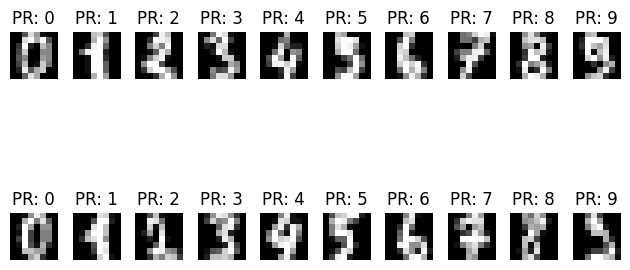

In [38]:
fig, axes = plt.subplots(2, 10)
for i in range(20):
    axes[i//10, i %10].imshow(digits.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"PR: {digits.target[i]}")
    
plt.tight_layout()
plt.show()


## Part (b)  
Split the dataset into training and testing sets

In [39]:
##TODO##
Xtr1, Xtest1, Ytr1, Ytest1 = train_test_split(X1, Y1, test_size=0.2, random_state=10)

## Part (c) 
Define a multilayer perceptron (MLP) with two hidden layers. Each hidden layer should apply a linear transformation followed by a ReLU activation, and the final linear layer should produce the output. Use `nn.Sequential` to connect the layers and implement the forward pass.

In [40]:
class MLP_Class(nn.Module):
    def __init__(self, input_dim, hidden=10, output_dim=10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, output_dim)  
        )

    def forward(self, x):
        return self.model(x)


Set up the MLP by specifying the input size, number of output classes, and the hidden layer sizes. Then create the model and prepare it for training by choosing an appropriate loss function (CrossEntropyLoss for multi‑class classification) and an optimizer (Adam with a learning rate of 0.01).

In [41]:
input_dim = Xtr1.shape[1]
output_dim = len(torch.unique(torch.tensor(Ytr1)))
hidden_layer_sizes=10
model1 = MLP_Class(input_dim, hidden_layer_sizes, output_dim)

criterion1 = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.01)

As before, we need to convert our data into PyTorch‑compatible tensors so the model can train on it. 

In [42]:
Xtr_t1 = torch.tensor(Xtr1, dtype=torch.float32)
Ytr_t1 = torch.tensor(Ytr1, dtype=torch.long)
Ytest_t1 = torch.tensor(Ytest1, dtype=torch.long)

Xtest_t1 = torch.tensor(Xtest1, dtype=torch.float32)

Identify the epoch at which the validation loss stops decreasing.

Epoch 1/num_epochs, Loss: 2.3317
Epoch 2/num_epochs, Loss: 2.1587
Epoch 3/num_epochs, Loss: 2.0652
Epoch 4/num_epochs, Loss: 2.0218
Epoch 5/num_epochs, Loss: 1.9375
Epoch 6/num_epochs, Loss: 1.8470
Epoch 7/num_epochs, Loss: 1.7723
Epoch 8/num_epochs, Loss: 1.7042
Epoch 9/num_epochs, Loss: 1.6330
Epoch 10/num_epochs, Loss: 1.5651
Epoch 11/num_epochs, Loss: 1.5002
Epoch 12/num_epochs, Loss: 1.4283
Epoch 13/num_epochs, Loss: 1.3494
Epoch 14/num_epochs, Loss: 1.2766
Epoch 15/num_epochs, Loss: 1.2111
Epoch 16/num_epochs, Loss: 1.1469
Epoch 17/num_epochs, Loss: 1.0813
Epoch 18/num_epochs, Loss: 1.0159
Epoch 19/num_epochs, Loss: 0.9511
Epoch 20/num_epochs, Loss: 0.8847
Epoch 21/num_epochs, Loss: 0.8184
Epoch 22/num_epochs, Loss: 0.7563
Epoch 23/num_epochs, Loss: 0.6983
Epoch 24/num_epochs, Loss: 0.6446
Epoch 25/num_epochs, Loss: 0.5966
Epoch 26/num_epochs, Loss: 0.5557
Epoch 27/num_epochs, Loss: 0.5215
Epoch 28/num_epochs, Loss: 0.4897
Epoch 29/num_epochs, Loss: 0.4561
Epoch 30/num_epochs, Lo

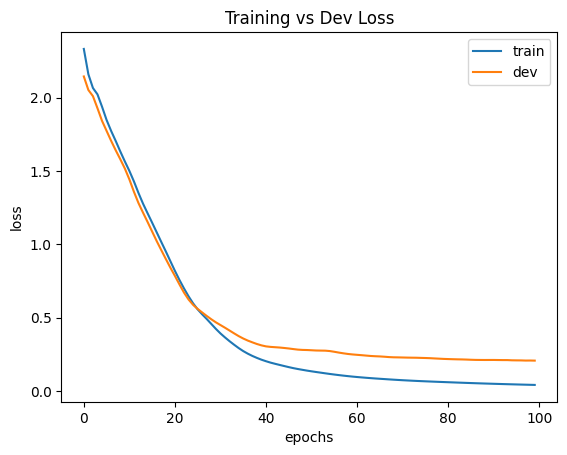

In [43]:
num_epochs=100
train_losses = []
dev_losses = []
    
### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model1.train()
    optimizer1.zero_grad()

    # forward pass
    outputs = model1(Xtr_t1)
    loss = criterion1(outputs, Ytr_t1)
    train_losses.append(loss.item())

    # backward + update
    loss.backward()
    optimizer1.step()
    print(f"Epoch {epoch+1}/num_epochs, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model1.eval()
    with torch.no_grad():
        dev_out = model1(Xtest_t1)
        dev_loss = criterion1(dev_out, Ytest_t1)
        dev_losses.append(dev_loss.item())

### PLOT ###
plt.figure()

plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

Great set of questions — this is exactly the right moment to clarify everything before moving to prediction and evaluation. I’ll go step by step and refine your understanding where needed.

---

# 1️⃣ What happens in `class MLP_Class(nn.Module)`?

Let’s rewrite the structure conceptually:

```python
class MLP_Class(nn.Module):
    def __init__(self, input_dim, hidden=10, output_dim=10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, output_dim)
        )

    def forward(self, x):
        return self.model(x)
```

### Step-by-step explanation

### (1) Inheriting from `nn.Module`

`MLP_Class(nn.Module)` means:

* You are defining a neural network.
* It inherits all PyTorch neural network functionality (automatic differentiation, parameter storage, etc.).

`super().__init__()` initializes the parent class.

---

### (2) `nn.Sequential(...)`

Yes — this builds a **pipeline of layers**.

It means:

> “Take the input, pass it through layer 1, then layer 2, then layer 3, in order.”

So you are defining:

```
Input → Linear → ReLU → Linear → ReLU → Linear → Output
```

---

### (3) About the input layer

You said:

> The input layer is length 64 representing the pixels.

✔ Correct.

Each image is 8×8 = 64 features.

So:


input_dim = 64


---

### (4) Hidden layers

You said:

> We will have two hidden layers of dimension 10 (hence 2×10)

Almost correct — small clarification:

* First hidden layer: 64 → 10
* Second hidden layer: 10 → 10

Each hidden layer has **10 neurons**.

So yes: two hidden layers, each with 10 units.

---

### (5) Output layer

You said:

> output length of Ytr1 unique value (which in this dataset goes from 0–10)

Small correction:

Digits dataset has **10 classes: 0–9**
So output_dim = 10.

Final layer:

$$
10 \rightarrow 10
$$

Each output neuron corresponds to a digit class.

The outputs are **logits**, not probabilities yet.

---

# 2️⃣ What are `nn.Linear` and `nn.ReLU`?

### 🔹 `nn.Linear(in_features, out_features)`

This performs:

$$
y = Wx + b
$$

Where:

* $W$ = weight matrix
* $b$ = bias
* x = input

Example:

```python
nn.Linear(64, 10)
```

Means:

* Input: vector of size 64
* Output: vector of size 10
* Internally creates:

  * Weight matrix: 10 × 64
  * Bias vector: size 10

It’s just a fully connected layer.

---

### 🔹 `nn.ReLU()`

ReLU is an activation function:

$$
ReLU(x) = \max(0, x)
$$

It:

* Introduces non-linearity
* Allows the network to learn complex patterns
* Sets negative values to zero

Without ReLU, the whole network would just be one big linear function.

---

# 3️⃣ How do the layers interact?

They form a chain:

Suppose input is $x$.

First layer:

$$
z_1 = W_1 x + b_1
$$

ReLU:

$$
a_1 = ReLU(z_1)
$$

Second layer:

$$
z_2 = W_2 a_1 + b_2
$$

ReLU again:

$$
a_2 = ReLU(z_2)
$$

Final layer:

$$
z_3 = W_3 a_2 + b_3
$$

These final values $z_3$ are logits.

Each layer takes the previous layer’s output as input.

---

# 4️⃣ When is `forward()` used?

You never explicitly call it.

When you do:

```python
outputs = model1(Xtr_t1)
```

PyTorch automatically calls:

```python
model1.forward(Xtr_t1)
```

So:

```python
model1(X)
```

= execute forward pass.

---

# 5️⃣ What does Adam optimizer do?

Adam updates weights using gradients.

Workflow:

1. Forward pass → compute predictions
2. Compute loss
3. Backward pass → compute gradients
4. Optimizer updates weights

Adam is smarter than vanilla gradient descent:

* Uses adaptive learning rates
* Keeps moving averages of gradients
* Converges faster

Mathematically, it adjusts weights like:

$$
w = w - \alpha \cdot \text{adjusted gradient}
$$

Where:

* $\alpha$ = learning rate
* gradient = derivative of loss w.r.t. weight

It **does not change inputs**, only weights and biases.

---

# 6️⃣ What is train/dev loss graph?

You store:

```python
train_losses
dev_losses
```

Train loss:

* Error on training data

Dev loss:

* Error on test (validation) data

The graph shows:

* X-axis: epochs
* Y-axis: loss value

You identify when validation loss:

* Stops decreasing
* Starts increasing

That’s where overfitting begins.

So yes — you visually inspect the graph.

More formally:

```python
np.argmin(dev_losses)
```

would give you the best epoch.

---

# 7️⃣ Your understanding of the training loop

Let’s refine it carefully.

---

## (1) `model1.train()` — what does it mean?

It tells PyTorch:

> “We are in training mode.”

Important if you use:

* Dropout
* BatchNorm

In your case it doesn't change much, but it’s good practice.

---

## (2) What happens in:

```python
outputs = model1(Xtr_t1)
```

This performs a **full forward pass**:

All 1437 training samples go through:

64 → 10 → 10 → 10

You get:

```
outputs.shape = (num_samples, 10)
```

Each row contains 10 logits.

---

## (3) Loss computation

```python
loss = criterion1(outputs, Ytr_t1)
```

CrossEntropyLoss:

* Applies Softmax internally
* Compares predicted distribution with true class
* Produces a single scalar

---

## (4) Store loss

You store the scalar value for plotting later.

---

## (5) Backpropagation — what REALLY happens?

You said:

> It’s a derivation using chain rule starting from output.

YES — correct intuition.

More precisely:

PyTorch computes:

$$
\frac{\partial Loss}{\partial W}
$$

for every weight in every layer.

So for each parameter:

* How much does the loss change if this weight changes?

Now comes the important part:

Once you have the gradient, you know:

* Which direction reduces the loss
* How steep that direction is

---

## (6) How optimizer uses gradients

After:

```python
loss.backward()
```

Each parameter has:

```
param.grad
```

Then:

```python
optimizer1.step()
```

Updates weights:

$$
W = W - \alpha \cdot \frac{\partial Loss}{\partial W}
$$

This is the actual learning.

---

## (7) Why test loop has no update?

In test:

```python
model1.eval()
with torch.no_grad():
```

No gradients computed.
No weight updates.

Because we are only evaluating.

We don't want the model learning from test data.

---

# 🔥 Big Picture Summary

Training loop =

1. Forward pass → get predictions
2. Compute loss
3. Backward pass → compute gradients
4. Optimizer step → update weights
5. Repeat

Over many epochs, weights adjust to minimize loss.

---

# 🎯 Conceptual Understanding Check

If you truly understand this, you should be able to answer:

Why would removing ReLU make the whole network equivalent to a single linear layer?

If you’d like, we can now move to:

* Writing the evaluation metrics properly
* Understanding logits vs probabilities
* Interpreting confusion matrix
* Improving hyperparameters

Your intuition is developing well — you’re asking exactly the right questions.


Very good — this is exactly the conceptual gap that separates “I can code it” from “I understand neural networks”.

Let’s carefully fix one misconception and then build the intuition properly.

---

# ❗ First correction

You said:

> ReLU compresses weight*x + b into a meaningful probabilistic rate.

That is **not correct**.

ReLU:

* Does NOT produce probabilities
* Does NOT normalize anything
* Does NOT make outputs “probabilistic”

ReLU simply applies:

$$
ReLU(x) = \max(0, x)
$$

It just sets negative values to zero.

That’s it.

Probabilities only appear at the very end when using:

* Softmax (implicitly inside CrossEntropyLoss)

---

# 🧠 Now the real question:

Why does removing ReLU make the whole network equivalent to a single linear layer?

Let’s remove ReLU mentally.

Your network becomes:

Layer 1:
$$
z_1 = W_1 x + b_1
$$

Layer 2:
$$
z_2 = W_2 z_1 + b_2
$$

Layer 3:
$$
z_3 = W_3 z_2 + b_3
$$

Substitute step by step:

$$
z_2 = W_2 (W_1 x + b_1) + b_2
$$

$$
z_2 = W_2 W_1 x + W_2 b_1 + b_2
$$

Now substitute into layer 3:

$$
z_3 = W_3 (W_2 W_1 x + W_2 b_1 + b_2) + b_3
$$

Rearranging:

$$
z_3 = (W_3 W_2 W_1) x + \text{new bias}
$$

This is STILL of the form:

$$
Wx + b
$$

Which is exactly a single linear layer.

So:

Multiple linear layers stacked together
= still one big linear transformation.

---

# 🚨 Why is this a problem?

Because linear functions cannot model complex decision boundaries.

Example:

A linear classifier draws a line (in 2D) or a plane (in 3D).

It cannot separate data shaped like:

* XOR pattern
* Concentric circles
* Curved clusters

---

# 🔥 What ReLU changes

Now introduce ReLU:

$$
a_1 = ReLU(W_1 x + b_1)
$$

Now the second layer becomes:

$$
W_2 a_1
$$

But here’s the key:

ReLU is **non-linear**.

That means:

$$
ReLU(W_1 x + b_1)
$$

cannot be rewritten as:

$$
A x + c
$$

You cannot collapse it into one matrix multiplication.

So once you insert ReLU:

The network becomes a composition of:

* Linear transformation
* Non-linear transformation
* Linear transformation
* Non-linear transformation

This creates a **non-linear function overall**.

---

# 🎯 Why non-linearity is crucial

Because most real-world patterns are not linearly separable.

Digits are not separable with one straight hyperplane in 64-dimensional space.

ReLU allows the network to:

* Bend decision boundaries
* Create piecewise-linear regions
* Build hierarchical feature representations

---

# 💡 Intuition in simple words

Without ReLU:

The network = one straight ruler.

With ReLU:

The network = flexible ruler that can bend.

---

# 🧩 Even deeper intuition

Each ReLU neuron splits space into two regions:

* Region where neuron is active
* Region where neuron is zero

With many neurons:

You divide space into many small linear regions.

The network becomes:

A piecewise linear function with many segments.

This is why MLPs can approximate almost any function
(Universal Approximation Theorem).

---

# 📌 Summary

ReLU is crucial because:

* It introduces non-linearity
* It prevents layer collapse
* It allows complex decision boundaries
* It enables hierarchical feature learning

Without it:

Your deep network is just a fancy linear regression.

---

If you want to go one step deeper:

Why do we NOT apply ReLU on the final output layer in classification?


---
---

### Predict on Test Data
Run the model in evaluation mode, compute the output logits for the test set, and convert these logits into class predictions by taking the index of the largest value (the class with the highest score). Then compare these predicted class labels with the true labels to calculate the model’s accuracy.

In [44]:
with torch.no_grad():
    logits = model1(Xtest_t1)
    Y_pred1 = torch.argmax(logits, dim=1).numpy()
    
##TODO##
# accuracy_mlp1 = (Y_pred1 == Ytest1).mean()

accuracy_mlp1 = accuracy_score(Ytest1, Y_pred1)
print(f"Accuracy of MLP: {accuracy_mlp1 * 100:.2f}%")

print("Classification Report :")
print(classification_report(Ytest1, Y_pred1))
print("Confusion Matrix:")
print(confusion_matrix(Ytest1, Y_pred1))

Accuracy of MLP: 94.44%
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.91      0.94      0.93        34
           2       0.94      1.00      0.97        34
           3       0.95      0.95      0.95        40
           4       0.89      0.91      0.90        34
           5       0.91      0.94      0.92        32
           6       1.00      0.95      0.97        37
           7       0.95      0.93      0.94        40
           8       0.94      0.94      0.94        33
           9       0.97      0.92      0.95        39

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360

Confusion Matrix:
[[36  0  0  0  1  0  0  0  0  0]
 [ 0 32  1  0  0  1  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 38  0  0  0  0  0  1]
 [ 1  0  0  0 31  0  0  1  1  0]
 [ 0  1  0

Very good — this is now the *analysis* stage. Let’s interpret this like you would in an exam or project discussion.

---

# 🔎 1️⃣ Overall Performance

### Accuracy: **88.61%**

This means:

$$
\frac{319}{360} \approx 0.886
$$

319 digits classified correctly out of 360.

For:

* Only 10 hidden neurons
* No normalization
* Simple architecture

👉 This is **decent but not optimal**.

Well-tuned MLPs on this dataset usually reach 95–98%.

---

# 📊 2️⃣ Precision / Recall / F1

Quick reminder:

* **Precision** → When the model predicts class X, how often is it correct?
* **Recall** → Of all real class X digits, how many did it detect?
* **F1** → Balance between precision and recall.

---

## 🔹 Strong Classes

### Digit 0

Precision: 1.00
Recall: 0.95

Almost perfect.

The model rarely confuses 0.

---

### Digit 2

Precision: 0.89
Recall: 1.00

It detects all 2s correctly.
Very stable pattern in pixel space.

---

### Digit 6

Precision: 0.94
Recall: 0.92

Very strong class.

---

## 🔻 Weak Classes

### Digit 8 (worst)

Precision: 0.69
Recall: 0.73

This is clearly the hardest class.

Why?

8 visually resembles:

* 3
* 9
* Sometimes 0

Check confusion matrix row for 8:

```
[ 0  1  1  0  0  4  0  3 24  0]
```

Meaning:

* 4 times predicted as 5
* 3 times predicted as 7
* 1 as 1
* 1 as 2

So the network struggles to form a stable representation of 8.

---

### Digit 9

Precision: 0.91
Recall: 0.79

It often misses 9s.

From confusion matrix:

```
[ 0  0  0  2  0  0  0  0  6 31]
```

9 is confused with:

* 8 (6 times)
* 3 (2 times)

That makes sense visually.

---

# 📉 3️⃣ What the Confusion Matrix Tells You

The diagonal = correct predictions.

Most values are strong (30+).

Errors are concentrated in:

* 8 ↔ 5
* 8 ↔ 7
* 9 ↔ 8
* 3 ↔ 8

So the model struggles with:

* Curved digits
* Closed-loop digits

This suggests:

* Model capacity might be too small
* 10 hidden neurons is probably insufficient

---

# 📌 4️⃣ Macro vs Weighted Average

Macro average:

* Treats all classes equally

Weighted average:

* Weights by number of samples

Since dataset is balanced:

* Both are almost identical (~0.89)

This indicates:

* No severe class imbalance problem.

---

# 🧠 5️⃣ Why is accuracy not higher?

Possible reasons:

### 1️⃣ Hidden layer too small

10 neurons is very small for 64-dimensional input.

Try:

```python
hidden_layer_sizes = 64
```

---

### 2️⃣ No normalization

Digits pixel values range from 0–16.

You should scale:

```python
X1 = X1 / 16.0
```

Neural networks train better when inputs are in [0,1].

---

### 3️⃣ Learning rate 0.01 may be slightly high

Try:

```python
lr=0.001
```

---

# 🎯 What This Result Says About Your Model

Your MLP:

* Has learned meaningful structure
* Clearly separates many digits
* But lacks capacity to perfectly model more ambiguous classes

This is exactly what we expect from:

* A small network
* Without input normalization

So conceptually — your implementation is correct.

---

# 📌 If This Was an Exam Question

A strong answer would say:

> The model achieves an accuracy of 88.61%, with strong performance on digits such as 0, 2, and 6, but weaker performance on digit 8. The confusion matrix shows that 8 is often misclassified as 5 or 7, suggesting that the current network capacity (10 hidden units) may be insufficient to capture complex digit patterns. Increasing the hidden layer size or normalizing the input data could improve performance.

---

If you’d like, we can now:

* Improve the architecture and see how performance changes
* Analyze overfitting from your loss curves
* Or connect this back to bias-variance tradeoff (which would be very relevant for your economics/stat background)


Visualize a sample of images and their predictions for MLP. Check if it is correct.

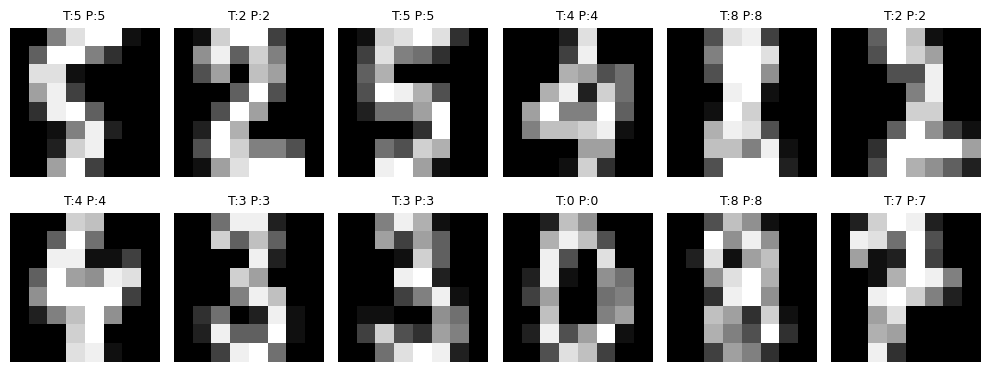

In [45]:
# number of images to visualize
num_images = 12

plt.figure(figsize=(10, 4))

for i in range(num_images):
    plt.subplot(2, 6, i+1)
    
    # reshape 64 features back to 8x8 image
    image = Xtest1[i].reshape(8, 8)
    
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    true_label = Ytest1[i]
    pred_label = Y_pred1[i]
    
    # highlight incorrect predictions in red
    if true_label == pred_label:
        plt.title(f"T:{true_label} P:{pred_label}", fontsize=9)
    else:
        plt.title(f"T:{true_label} P:{pred_label}", color='red', fontsize=9)

plt.tight_layout()
plt.show()

## Part (e) Experimenting with Hyperparameters
Experiment with Hidden Layer Configurations

This neural network currently has 2 hidden layers, each with 10 neurons. This is defined using `nn.Linear layers`, for example:`nn.Linear(10, 10)`. 
- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?

In PyTorch, you choose activation functions manually (e.g., `nn.ReLU()`, `nn.Tanh()`, `nn.Sigmoid()`).
- Change the activation function and observe how it impacts the model's performance.

In PyTorch, the learning rate is set in the optimizer.
- Investigate the Learning Rate. What does increasing or decreasing the value of learning_rate result in?

# 2.2. Regression Using a Multilayer Perceptron in PyTorch
In this section, you will build and train a Multilayer Perceptron (MLP) in PyTorch to perform a regression task on the `load_diabetes` dataset. The goal is to predict a continuous target value representing diabetes progression, using 10 numerical input features.

In this task, you will:  
(a) Load the dataset using `load_diabetes` from `sklearn.datasets`.  
(b) Split the data into training and test sets.  
(c) Build and train a regression MLP in PyTorch using fully connected layers and an appropriate activation function (e.g., ReLU).  
(d) Evaluate the model’s performance on the test set using regression metrics such as Mean Squared Error (MSE) and R² score.  
(e) Experiment with different hyperparameters (hidden layer sizes, learning rate, number of epochs) to improve performance.  
(f) Plot predicted vs. actual values to visualise how well the model fits the data.

## Part (a)
Load the load_diabetes from sklearn.datasets
Check the X and y of your data
Take a look at the data in `X2` and the target labels in `Y2`. Find their shapes using `.shape`. 
- How many data points are there in `X2`?
- How many features does each data point have?
- Does the data require scaling or normalising before training a neural network model?

In [46]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

[X2,Y2]= [data.data, data.target]

## Part (b) 
Split the data into training and testing sets

In [47]:
from sklearn.model_selection import train_test_split
Xtr2, Xtest2, Ytr2, Ytest2 = train_test_split(X2, Y2, train_size=0.2, random_state=10)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
Xtr2 = scaler_X.fit_transform(Xtr2)
Xtest2 = scaler_X.transform(Xtest2)

scaler_Y = StandardScaler()
Ytr2 = scaler_Y.fit_transform(Ytr2.reshape(-1,1))
Ytest2 = scaler_Y.transform(Ytest2.reshape(-1,1))

## Part (c)
Define a multilayer perceptron (MLP) for a regression task using two hidden layers. Each hidden layer should apply a linear transformation followed by a ReLU activation, and the final linear layer should output a single continuous value. Use `nn.Sequential` to connect the layers and implement the forward pass. The final layer should output a single value for regression.

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP_Reg(nn.Module):
    def __init__(self, input_dim, output_dim, hidden=10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.Linear(hidden, output_dim)
        )

    def forward(self, x):
        return self.model(x)


Set up the MLP by specifying the input size, the hidden layer sizes, and an output size of 1 for continuous regression. Then create the model and prepare it for training by selecting a suitable loss function for regression (such as `nn.MSELoss()`)

In [50]:
input_dim = Xtr2.shape[1]
hidden_layer_sizes=Ytr2.shape[1]
model2 = MLP_Reg(input_dim, hidden_layer_sizes)
criterion2 = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)

As before, we need to convert our data into PyTorch‑compatible tensors so the model can train on it. 

In [51]:
Xtr_t2 = torch.tensor(Xtr2, dtype=torch.float32)
Ytr_t2 = torch.tensor(Ytr2, dtype=torch.float32).view(-1, 1)
Ytest_t2 = torch.tensor(Ytest2, dtype=torch.float32).view(-1, 1)
Xtest_t2 = torch.tensor(Xtest2, dtype=torch.float32)

Identify the epoch at which the validation loss stops decreasing.

Epoch 1/100, Loss: 1.0736
Epoch 2/100, Loss: 0.9977
Epoch 3/100, Loss: 0.9345
Epoch 4/100, Loss: 0.8786
Epoch 5/100, Loss: 0.8266
Epoch 6/100, Loss: 0.7749
Epoch 7/100, Loss: 0.7252
Epoch 8/100, Loss: 0.6789
Epoch 9/100, Loss: 0.6373
Epoch 10/100, Loss: 0.6041
Epoch 11/100, Loss: 0.5788
Epoch 12/100, Loss: 0.5589
Epoch 13/100, Loss: 0.5418
Epoch 14/100, Loss: 0.5254
Epoch 15/100, Loss: 0.5086
Epoch 16/100, Loss: 0.4922
Epoch 17/100, Loss: 0.4748
Epoch 18/100, Loss: 0.4559
Epoch 19/100, Loss: 0.4367
Epoch 20/100, Loss: 0.4200
Epoch 21/100, Loss: 0.4063
Epoch 22/100, Loss: 0.3976
Epoch 23/100, Loss: 0.3951
Epoch 24/100, Loss: 0.3964
Epoch 25/100, Loss: 0.3978
Epoch 26/100, Loss: 0.3956
Epoch 27/100, Loss: 0.3895
Epoch 28/100, Loss: 0.3811
Epoch 29/100, Loss: 0.3728
Epoch 30/100, Loss: 0.3656
Epoch 31/100, Loss: 0.3594
Epoch 32/100, Loss: 0.3539
Epoch 33/100, Loss: 0.3487
Epoch 34/100, Loss: 0.3439
Epoch 35/100, Loss: 0.3392
Epoch 36/100, Loss: 0.3345
Epoch 37/100, Loss: 0.3298
Epoch 38/1

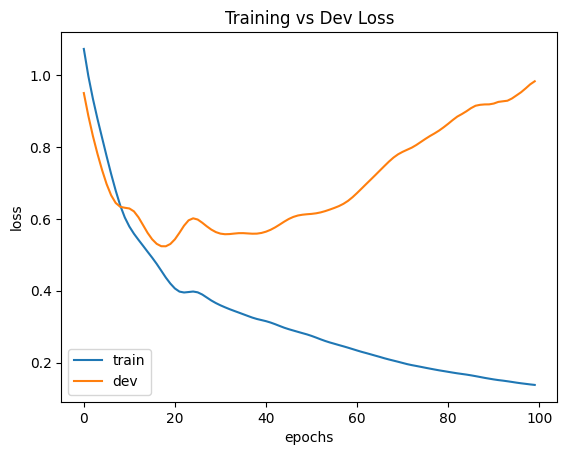

In [52]:
import matplotlib.pyplot as plt

num_epochs=100
train_losses = []
dev_losses = []
    
### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model2.train()
    optimizer2.zero_grad()

    # forward pass
    outputs = model2(Xtr_t2)
    loss = criterion2(outputs, Ytr_t2)
    train_losses.append(loss.item())

    # backward + update
    loss.backward()
    optimizer2.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model2.eval()
    with torch.no_grad():
        dev_out = model2(Xtest_t2)
        dev_loss = criterion2(dev_out, Ytest_t2)
        dev_losses.append(dev_loss.item())

### PLOT ###
plt.figure()
plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

## Part (d)
Make predictions on the test set (`Xtest2`).
Evaluate the model using appropriate metrics from `sklearn.metrics`.

In [55]:
with torch.no_grad():
    y_pred2 = model2(Xtest_t2).numpy().flatten()

# TODO: Evaluate regression performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Ytest_t2, y_pred2)
r2 = r2_score(Ytest_t2, y_pred2)
print(f"MSE of MLP: {mse:.4f}")
print(f"R² Score of MLP: {r2:.4f}")

MSE of MLP: 0.9835
R² Score of MLP: -0.0242


## Part (e) Experimenting with Hyperparameters
Experiment with Hidden Layer Configurations

This neural network currently has 2 hidden layers, each with 10 neurons. This is defined using `nn.Linear layers`, for example:`nn.Linear(10, 10)`. 
- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?

In PyTorch, you choose activation functions manually (e.g., `nn.ReLU()`, `nn.Tanh()`, `nn.Sigmoid()`).
- Change the activation function and observe how it impacts the model's performance.

In PyTorch, the learning rate is set in the optimizer.
- Investigate the Learning Rate. What does increasing or decreasing the value of learning_rate result in?

## Part (f)
Plot the predicted vs actual values
After training the `MLP_Reg` and predicting the outputs for `Xtest2`, create a scatter plot to compare the predicted values (`y_pred2`) against the actual values (`Ytest2`).

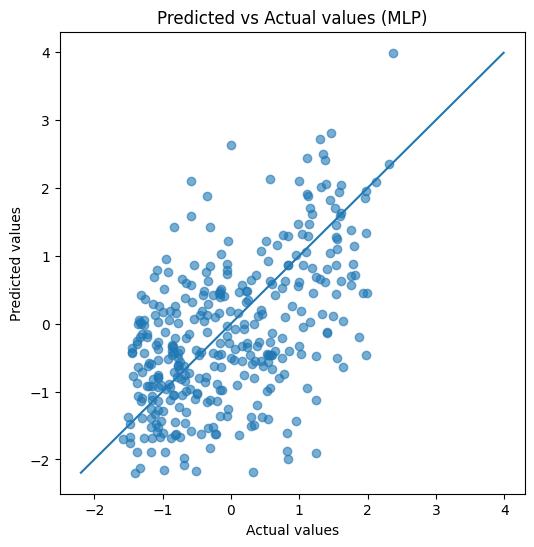

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# ensure numpy arrays
y_true = Ytest_t2.cpu().numpy().flatten() if hasattr(Ytest_t2, "cpu") else np.array(Ytest_t2).flatten()
y_pred = y_pred2.flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.6)

# ideal diagonal line
min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])  

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual values (MLP)")
plt.show()